![](https://1tskcg39n5iu1jl9xp2ze2ma-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/cross-site-scripting-example.png)

# Acknowledgements
Khalid, Usama (2019), “XSS Attacks Dataset”, Mendeley Data, V1, doi: 10.17632/9jhzmswdfj.1

In [1]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 906 kB/s 


In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("../input/xss-attacks-dataset/XSS Attack Dataset with 461 entries.xlsx")
df.head()

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,XSSDetector,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getDeviceId,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
1,Attackers 2,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getSimSerialNumber,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
2,Attackers 3,"INTERNET,ACCESS_FINE_LOCATION,ACCESS_COARSE_LO...",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No
3,Attackers 4,"INTERNET,READ_PHONE_STATE,SEND_SMS",Not Sensitive,http://demo2.5riversmarketing.com/,104.243.40.3,USA - Florida,No
4,Attackers 5,"INTERNET,READ_CONTACTS,READ_PHONE_STATE",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No


In [3]:
print("Unique values in App Names:", len(pd.unique(df['App Names'])))
print("Unique values in Permissions:", len(pd.unique(df['Permissions'])))
print("Unique values in API Name:", len(pd.unique(df['API Name'])))
print("Unique values in Website Name:", len(pd.unique(df['Website Name'])))
print("Unique values in IP:", len(pd.unique(df['IP'])))
print("Unique values in Location:", len(pd.unique(df['Location'])))
print("Unique values in Label:", len(pd.unique(df['Label'])))

Unique values in App Names: 460
Unique values in Permissions: 27
Unique values in API Name: 39
Unique values in Website Name: 446
Unique values in IP: 447
Unique values in Location: 163
Unique values in Label: 2


In [4]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
df.head()        

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,435,12,16,3,21,148,1
1,48,12,27,3,21,148,1
2,49,9,2,3,21,148,0
3,50,16,2,0,21,148,0
4,51,13,2,3,21,148,0


In [5]:
df.corr().abs()['Label'].sort_values(ascending = False)

Label           1.000000
API Name        0.777282
App Names       0.075896
Permissions     0.034151
Website Name    0.029288
Location        0.020264
IP              0.015536
Name: Label, dtype: float64

API Name is very strongly correlated with Label.

# Basic plotting

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


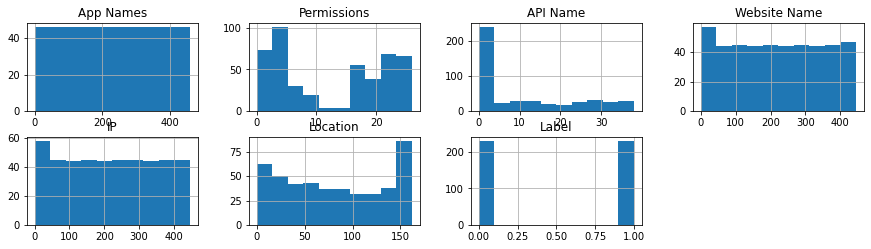

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(layout=(5,4), figsize=(15,10))

plt.show()

# Modelling with different models and stratified k fold 

In [7]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Applying pipeline with scaling variables

In [8]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = make_pipeline(StandardScaler(),LogisticRegression())
	models['knn'] = make_pipeline(StandardScaler(),KNeighborsClassifier())
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = make_pipeline(StandardScaler(),SVC())
	models['bayes'] = make_pipeline(StandardScaler(), GaussianNB())
	return models

X = df.drop(['Label'], axis = 1)
y = df['Label']

In [9]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.950 (0.036)
>knn 0.859 (0.058)
>cart 0.999 (0.008)
>svm 0.933 (0.040)
>bayes 1.000 (0.000)


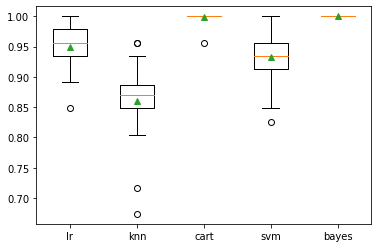

In [10]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# So we can see Naive Bayes gave 100% accuracy.
## Then comes Decision Tree classifier with 99.9% accuracy

# Upvote if you like it or fork it.